In [1]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# Twitter Api Credentials
consumerKey = "XhdYabVocmqWCex5hCD8jBD9h"
consumerSecret = "NRyh3oOKMDHgSBh7htAB3T8Uzii7ffL3EBsNM5LGLEvG1JZkq7"
accessToken = "1232645972313796609-6wXttbepUkycE9TFuRIaa3W9c5iLQy"
accessTokenSecret = "KDLUnTGBnAeqGa9cbUaNu0OAYXYLJQ4h9cyYgVz2Cyk5u"

# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)


In [4]:
# Extract 1000 tweets from the twitter user
posts = api.user_timeline(screen_name="tokopedia", count = 1000, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) GIVEAWAY                          GIVEAWAY
ALBUM                                LIGHTSTICK https://t.co/wuccKsQZU1

2) Belanja elektronik harga bersahabat,
bikin kerja jadi makin giat!
Ada diskon hingga 60% dan cashback hingga 200ribu

Cek di sini:
https://t.co/DJZMMNpWzo https://t.co/nwduAYeTII

3) Di rumah aja tetap gaya dengan fashion terbaru yang bisa kamu dapatkan dengan cashback hingga Rp70Rb. Temukan gaya favoritmu di https://t.co/2KblBLyiEh
_
#Fashion

4) Masker Case + Free Bottle - Rp64.900
https://t.co/4oILKsKy26 https://t.co/lUJWCMrCOD

5) masker Case Motif - Rp30.000
https://t.co/HZomjbkdES https://t.co/mNZzlzG65U



In [5]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 10 rows of data
df.head()

,Tweets
0,GIVEAWAY GIVEAWAY\nAL...
1,"Belanja elektronik harga bersahabat,\nbikin ke..."
2,Di rumah aja tetap gaya dengan fashion terbaru...
3,Masker Case + Free Bottle - Rp64.900\nhttps://...
4,masker Case Motif - Rp30.000\nhttps://t.co/HZo...


In [6]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,GIVEAWAY GIVEAWAY\nAL...
1,"Belanja elektronik harga bersahabat,\nbikin ke..."
2,Di rumah aja tetap gaya dengan fashion terbaru...
3,Masker Case + Free Bottle - Rp64.900\n
4,masker Case Motif - Rp30.000\n
...,...
195,Yang hobi baca buku mana suaranya? Kamu bisa d...
196,Dear 2021 semoga aku lebih sering checkout bar...
197,Pagi! Siapa nih artis favorit kamu selama Toko...
198,Lagi nyari kebutuhan kendaraan di akhir tahun?...


In [7]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,GIVEAWAY GIVEAWAY\nAL...,0.0,0.0
1,"Belanja elektronik harga bersahabat,\nbikin ke...",0.0,0.0
2,Di rumah aja tetap gaya dengan fashion terbaru...,0.0,0.0
3,Masker Case + Free Bottle - Rp64.900\n,0.8,0.4
4,masker Case Motif - Rp30.000\n,0.0,0.0
...,...,...,...
195,Yang hobi baca buku mana suaranya? Kamu bisa d...,0.0,0.0
196,Dear 2021 semoga aku lebih sering checkout bar...,0.0,0.0
197,Pagi! Siapa nih artis favorit kamu selama Toko...,0.0,0.0
198,Lagi nyari kebutuhan kendaraan di akhir tahun?...,0.0,0.0


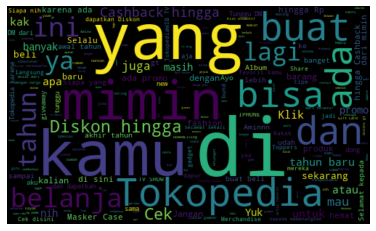

In [8]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [9]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):

    
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,GIVEAWAY GIVEAWAY\nAL...,0.0,0.0,Neutral
1,"Belanja elektronik harga bersahabat,\nbikin ke...",0.0,0.0,Neutral
2,Di rumah aja tetap gaya dengan fashion terbaru...,0.0,0.0,Neutral
3,Masker Case + Free Bottle - Rp64.900\n,0.8,0.4,Positive
4,masker Case Motif - Rp30.000\n,0.0,0.0,Neutral
...,...,...,...,...
195,Yang hobi baca buku mana suaranya? Kamu bisa d...,0.0,0.0,Neutral
196,Dear 2021 semoga aku lebih sering checkout bar...,0.0,0.0,Neutral
197,Pagi! Siapa nih artis favorit kamu selama Toko...,0.0,0.0,Neutral
198,Lagi nyari kebutuhan kendaraan di akhir tahun?...,0.0,0.0,Neutral


In [10]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets,Subjectivity,Polarity,Analysis
0,GIVEAWAY GIVEAWAY\nAL...,0.0,0.0,Neutral
1,"Belanja elektronik harga bersahabat,\nbikin ke...",0.0,0.0,Neutral
2,Di rumah aja tetap gaya dengan fashion terbaru...,0.0,0.0,Neutral
3,Masker Case + Free Bottle - Rp64.900\n,0.8,0.4,Positive
4,masker Case Motif - Rp30.000\n,0.0,0.0,Neutral
...,...,...,...,...
195,Yang hobi baca buku mana suaranya? Kamu bisa d...,0.0,0.0,Neutral
196,Dear 2021 semoga aku lebih sering checkout bar...,0.0,0.0,Neutral
197,Pagi! Siapa nih artis favorit kamu selama Toko...,0.0,0.0,Neutral
198,Lagi nyari kebutuhan kendaraan di akhir tahun?...,0.0,0.0,Neutral


In [11]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1) Masker Case + Free Bottle - Rp64.900
 

2) Banyak pilihan gadget yang smart di era serba cepat! Yuk belanja di Gadget on Tuesday dan dapatkan Diskon hingga 70% + Cashback hingga 170RB! Klik &gt;

HPGadget GOT

3) DROP YOUR FAVORITE GIF HEREEE

👇🏻👇🏻👇🏻👇🏻👇🏻👇🏻👇🏻👇🏻👇🏻👇🏻👇🏻👇🏻👇🏻

4) 1111 Selamat Tahun Baru 2021, Kak Rofidabyan! Semoga sehat dan bahagia selalu ya Kak! Kami sudah mengirimkan pesan ke Kakak melalui Direct Message (DM) ya Kak. Mohon kesediaan Kakak untuk mengecek DMnya. Kami tunggu balasannya.

5) Throwback performance KING NASSAR di TokopediaWIB TV SHOW bulan lalu! Siapa yang kangennnn??? Happy birthday juga yaa buat King Nassar🥰👑👑🥰

KINGNASSARDAY 

6) BREAKING NEWS LAINNYA 📺 LIVE dari Tokopedia Tower!
Setiap hari Selasa di bulan Januari bakal ada Gadget on Tuesday (GOT) Quiz berhadiah di IG Story Tokopedia!
JANGAN SAMPAI KETINGGALAN 🤩🤩
HPGadget GadgetOnTuesday Quiz KuisIndonesia KuisGiveaway

7) Selamat pagi dari hari Senin pertama di 2021 :)

8)  Am

In [12]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) Hai, Ibu-ibu, pas suami asyik main game atau sibuk sendiri sama hobi mereka, mending belanja alat-alat dapur di Karnaval Dapur.
Klik link ini  ! Yuk BuIbu buruan diserbu! Mimin nitip yaa buat di kost-an 😆😆
HomeNLiving KarnavalDapur

2) _aja Estetik banget siah alas pancinya! 😎



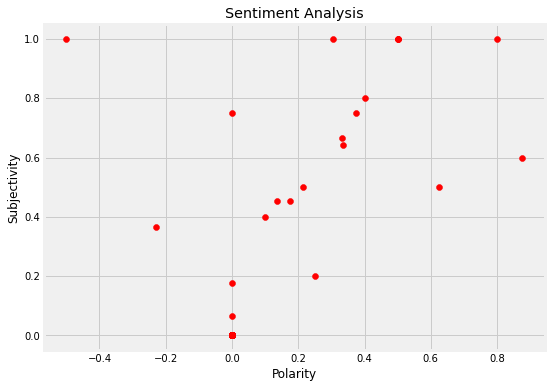

In [13]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Red') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [14]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

8.0

In [15]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)


1.0

In [16]:
# Show the value counts
df['Analysis'].value_counts()

Neutral     182
Positive     16
Negative      2
Name: Analysis, dtype: int64